In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("./archive/cnbc_headlines.csv")

# Convert 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time']).dt.date

df.dropna(inplace=True)

c:\Users\baruchfrost\Anaconda3\envs\dev\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname ET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [74]:
df.head(10)

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,2020-07-17,"""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,2020-07-17,"""Mad Money"" host Jim Cramer rings the lightnin..."
3,"Cramer's week ahead: Big week for earnings, ev...",2020-07-17,"""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,2020-07-17,"Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
5,Wall Street delivered the 'kind of pullback I'...,2020-07-16,"""Look for the stocks of high-quality companies..."
6,Cramer's lightning round: I would just stay lo...,2020-07-16,"""Mad Money"" host Jim Cramer rings the lightnin..."
7,Acorns CEO: Parents can turn $5 into five figu...,2020-07-16,"Investing $5 per day can compound to $70,000 b..."
8,Dividend cuts may mean rethinking your retirem...,2020-07-16,Hundreds of companies have cut or suspended th...
10,StockX has authenticated 1 million Jordan snea...,2020-07-15,"""We've been able to capture these cultural mom..."
11,Biohaven Pharmaceuticals lands Khloe Kardashia...,2020-07-15,Biohaven CEO Vlad Coric said the company broug...


In [75]:
review_df = df[['Headlines']]

print(review_df.shape)
review_df.head(5)

(2800, 1)


,Headlines
0,Jim Cramer: A better way to invest in the Covi...
1,Cramer's lightning round: I would own Teradyne
3,"Cramer's week ahead: Big week for earnings, ev..."
4,IQ Capital CEO Keith Bliss says tech and healt...
5,Wall Street delivered the 'kind of pullback I'...


In [76]:
# Filter data within the specified time frame
start_date = pd.to_datetime('2019-07-01')
end_date = pd.to_datetime('2020-07-01')
df_filtered = df[(df['Time'] >= start_date) & (df['Time'] <= end_date)]

C:\Users\baruchfrost\AppData\Local\Temp\ipykernel_16580\1662762620.py:4: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  df_filtered = df[(df['Time'] >= start_date) & (df['Time'] <= end_date)]


In [77]:
from textblob import TextBlob

# Perform sentiment analysis on headlines
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

def sentiment_binning(sentiment):
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to filtered headlines
df_filtered['Sentiment Score'] = df_filtered['Headlines'].apply(analyze_sentiment)

df_filtered['Sentiment'] = df_filtered['Sentiment Score'].apply(sentiment_binning)

C:\Users\baruchfrost\AppData\Local\Temp\ipykernel_16580\2350247784.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Sentiment Score'] = df_filtered['Headlines'].apply(analyze_sentiment)
C:\Users\baruchfrost\AppData\Local\Temp\ipykernel_16580\2350247784.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Sentiment'] = df_filtered['Sentiment Score'].apply(sentiment_binning)


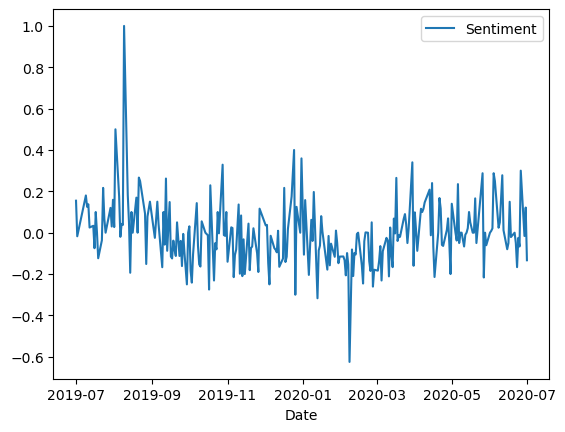

In [78]:
sentiment_score_data = df_filtered[["Time", "Sentiment Score"]]
sentiment_score_data.set_index("Time", inplace=True)

sentiment_score_data_by_day = sentiment_score_data.groupby("Time")['Sentiment Score'].apply(np.mean)

sentiment_data = pd.DataFrame({"Sentiment": sentiment_score_data_by_day, "Date": sentiment_score_data_by_day.index})
sentiment_data.set_index("Date", inplace=True)

sentiment_data.plot(kind="line")
plt.show()

In [79]:
sentiment_data.to_csv("./analysis result data/cnbc_news_sentiment_data.csv")